In [1]:
pip install numpy pandas scikit-learn scipy matplotlib


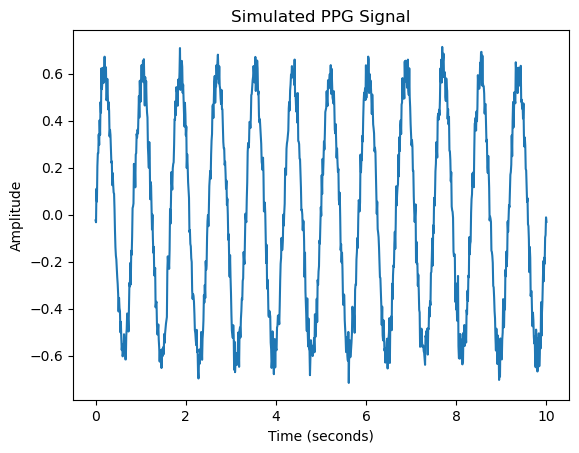

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Simulating PPG signal (replace this with actual PPG data)
fs = 100  # Sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # 10 seconds of data
ppg_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t) + np.random.normal(0, 0.05, len(t))

# Simulated blood pressure (replace with real BP data)
systolic_bp = 120 + 5 * np.sin(2 * np.pi * 0.1 * t) + np.random.normal(0, 2, len(t))  # Simulated systolic BP
diastolic_bp = 80 + 3 * np.sin(2 * np.pi * 0.1 * t) + np.random.normal(0, 1.5, len(t))  # Simulated diastolic BP

# Plot the PPG signal
plt.plot(t, ppg_signal)
plt.title("Simulated PPG Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


In [3]:
# Extract heart rate (HR) from PPG peaks
peaks, _ = find_peaks(ppg_signal, distance=fs*0.6)  # Detecting peaks (heartbeats)
ibi = np.diff(peaks) / fs  # Inter-beat interval (time between beats in seconds)
heart_rate = 60 / ibi  # Convert IBI to beats per minute

# Simulate Pulse Transit Time (PTT) feature (replace this with actual calculation)
# PTT could be calculated using ECG + PPG signals, but here we simulate it
ptt = 0.3 + 0.01 * np.random.randn(len(heart_rate))  # Simulated PTT values

# Create a feature matrix and labels for machine learning
features = np.vstack((heart_rate[:len(ptt)], ptt)).T
labels = systolic_bp[:len(ptt)]  # Using systolic BP as labels

# Convert to pandas DataFrame
df = pd.DataFrame(features, columns=['Heart_Rate', 'PTT'])
df['Systolic_BP'] = labels

print(df.head())


   Heart_Rate       PTT  Systolic_BP
0   68.965517  0.304290   119.059765
1   75.000000  0.281230   118.304958
2   71.428571  0.291431   121.210160
3   72.289157  0.269187   119.086185
4   68.965517  0.281800   117.776857


Mean Squared Error: 3.450997346349304


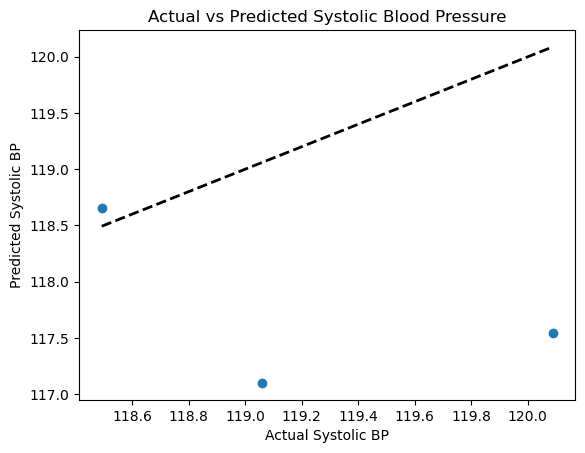

In [4]:
# Split data into training and testing sets
X = df[['Heart_Rate', 'PTT']]
y = df['Systolic_BP']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Systolic BP')
plt.ylabel('Predicted Systolic BP')
plt.title('Actual vs Predicted Systolic Blood Pressure')
plt.show()


In [5]:
# New PPG signal (replace with real PPG data)
new_ppg_signal = 0.6 * np.sin(2 * np.pi * 1.2 * t) + np.random.normal(0, 0.05, len(t))

# Extract features from new PPG signal
peaks, _ = find_peaks(new_ppg_signal, distance=fs*0.6)
ibi = np.diff(peaks) / fs
new_heart_rate = 60 / ibi[:len(ptt)]  # Use only up to length of ptt

# Simulate PTT for new data
new_ptt = 0.3 + 0.01 * np.random.randn(len(new_heart_rate))

# Create feature matrix
new_features = np.vstack((new_heart_rate, new_ptt)).T

# Predict blood pressure
predicted_bp = model.predict(new_features)
print("Predicted Systolic BP:", predicted_bp)


Predicted Systolic BP: [118.40090915 117.46411285 118.9448948  117.35633956 117.66370523
 117.65495039 117.9153317  117.21776895 117.555702   118.92164374
 118.9096462  122.51359184]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
